# Pymaceuticals Inc.
---

### Analysis

My assignment, as senior data analyst at Pymaceuticals, Inc., was to take the complete data set from our most recent animal study and provide tables and figures. Below is a brief analysis of the data.

First, we remove the duplicate g989 mouse to arrive at the total number of mice in the study: 248.

If you take a look at the bar graph, you can see that the following: 
- Drug 'Capomulin' has the maximum mice number at 230
- Drug 'Propriva' has the smaller mice number at 148

We decide to focus on the following Drug Regimens: 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'.

We can also determine that there are more male mice than female mice in this dataset. It also suggests that of treatments we've decided to focus on, Capomulin and Ramicane reduce the size of tumors better.

By calculating quartiles and using a box and whisker plot we can determine that Infubinol is the only Drug Regimen that has a potential outlier.

Finally, we determine correlation between the average weight and tumor volume for the mice in the capamulin drug regimen and plot a regression line. Using this information we can state the following:
- The correlation between mouse weight and average tumor volume is 0.84 which is a positive correlation. This means that when the mouse weight increases the average tumor volume also increases.


In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_merged_df = pd.merge(study_results, mouse_metadata, how='left',on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
mouse_merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mice_total = len(mouse_merged_df['Mouse ID'].unique())
mice_total

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = mouse_merged_df.loc[mouse_merged_df.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_duplicates

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dups_df = mouse_merged_df.loc[mouse_merged_df['Mouse ID'] == 'g989']
mice_dups_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean_df = mouse_merged_df.drop(mouse_merged_df.loc[mouse_merged_df['Mouse ID']=='g989'].index)
mice_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Used to confirm there are no more rows with info for 'Mouse ID' g989.
# DELETE BEFORE SUBMITTING.
mice_clean_check = mice_clean_df.loc[mice_clean_df['Mouse ID'] == 'g989']
mice_clean_check

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_clean_total =len(mice_clean_df['Mouse ID'].unique())
mice_clean_total

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
mean_tumor_vol = mice_clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
#mean_tumor_vol
med_tumor_vol = mice_clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
#med_tumor_vol
var_tumor_vol = mice_clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
#var_tumor_vol
stdev_tumor_vol = mice_clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
#stdev_tumor_vol
sterror_tumor_vol = mice_clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
#sterror_tumor_vol

In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stat_summary_df = pd.DataFrame({'Mean Tumor Volume' : mean_tumor_vol,
                                'Median Tumor Volume' : med_tumor_vol,
                                'Tumor Volume Variance' : var_tumor_vol,
                                'Tumor Volume Std. Dev.' : stdev_tumor_vol,
                                'Tumor Volume Std. Err.' : sterror_tumor_vol
})
stat_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_drug = mice_clean_df['Drug Regimen'].value_counts()
mice_per_drug


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<Axes: xlabel='Drug Regimen'>

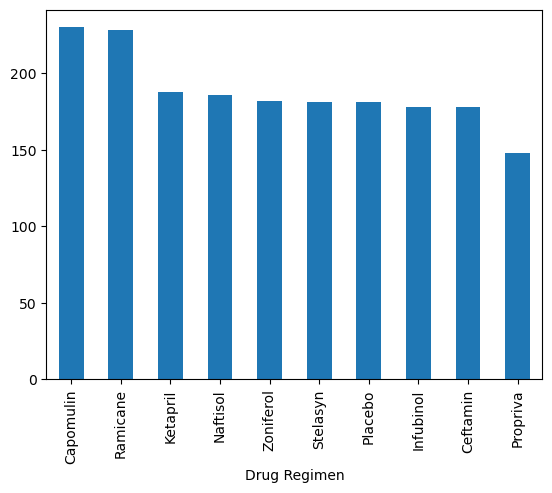

In [14]:
pandas_plot = mice_per_drug.plot.bar()
pandas_plot

In [15]:
x_axis = mice_clean_df['Drug Regimen'].unique()
y_axis = mice_per_drug.values
#y_axis
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_axis, y_axis, width=.5, color='b', align='center')
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

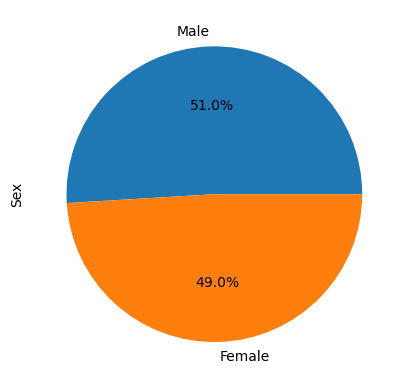

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = mice_clean_df['Sex'].value_counts()
gender_plot = mice_gender.plot.pie(autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


Text(0, 0.5, 'sex')

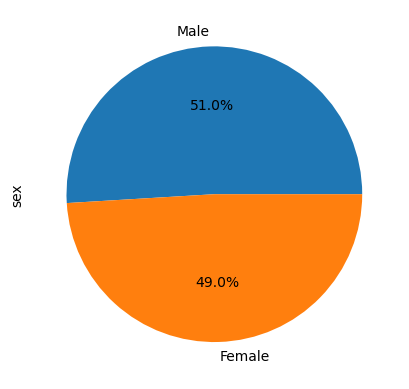

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female = mice_gender.values
labels = ['Male', 'Female']
plt.pie(male_female, labels=labels, autopct="%1.1f%%")
plt.ylabel('sex')

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin (I'm creating separate DataFrames for 
# containing only data for a specified drug regimen)
capomulin_df = mice_clean_df.loc[mice_clean_df['Drug Regimen'] == 'Capomulin']
ramicane_df = mice_clean_df.loc[mice_clean_df['Drug Regimen'] == 'Ramicane']
infubinol_df = mice_clean_df.loc[mice_clean_df['Drug Regimen'] == 'Infubinol']
ceftamin_df = mice_clean_df.loc[mice_clean_df['Drug Regimen'] == 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
capomulin_tumor_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_tumor_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_tumor_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_tumor_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_vol = pd.DataFrame(capomulin_tumor_last)
capomulin_merge = pd.merge(capomulin_vol,mice_clean_df, on=('Mouse ID','Timepoint'), how='left')
capomulin_merge.head()

ramicane_vol = pd.DataFrame(ramicane_tumor_last)
ramicane_merge = pd.merge(ramicane_vol, mice_clean_df, on=('Mouse ID','Timepoint'), how='left')

infubinol_vol = pd.DataFrame(infubinol_tumor_last)
infubinol_merge = pd.merge(infubinol_vol, mice_clean_df, on=('Mouse ID','Timepoint'), how='left')

ceftamin_vol = pd.DataFrame(ceftamin_tumor_last)
ceftamin_merge = pd.merge(ceftamin_vol,mice_clean_df, on=('Mouse ID','Timepoint'), how='left')


In [21]:

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    # add subset 
   
    # Determine outliers using upper and lower bounds

capomulin_tumors_final = capomulin_merge.set_index('Mouse ID')['Tumor Volume (mm3)']
cap_quartiles = capomulin_tumors_final.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

In [22]:
ramicane_tumors_final = ramicane_merge.set_index('Mouse ID')['Tumor Volume (mm3)']
ram_quartiles = ramicane_tumors_final.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

In [23]:
infubinol_tumors_final = infubinol_merge.set_index('Mouse ID')['Tumor Volume (mm3)']
inf_quartiles = infubinol_tumors_final.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

In [24]:
ceftamin_tumors_final = ceftamin_merge.set_index('Mouse ID')['Tumor Volume (mm3)']
cef_quartiles = ceftamin_tumors_final.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    # add subset 
   
    # Determine outliers using upper and lower bounds

Text(0.5, 1.0, 'Distrubution of Tumor Volume per Treatment Group')

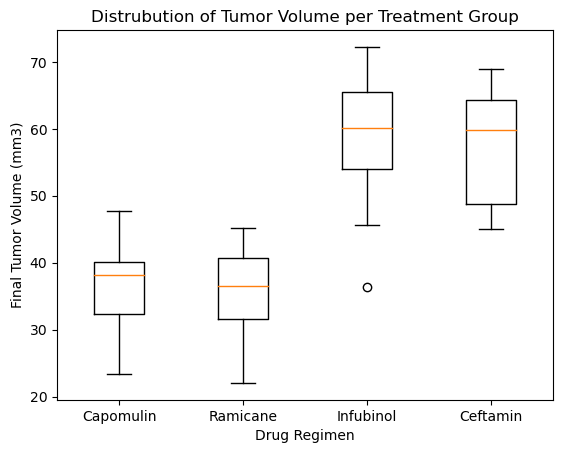

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plot_data = [capomulin_tumors_final, ramicane_tumors_final, infubinol_tumors_final, ceftamin_tumors_final]
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, ax1 = plt.subplots()
ax1.boxplot(plot_data, labels=drugs, widths= 0.4)
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title('Distrubution of Tumor Volume per Treatment Group')

## Line and Scatter Plots

In [27]:
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

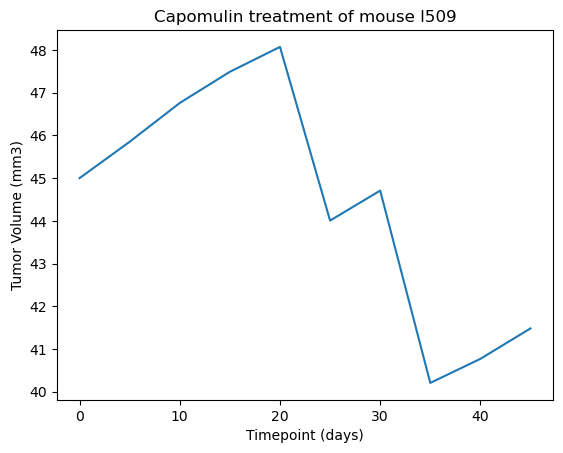

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_line = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509']

xaxis = capomulin_line['Timepoint']
yaxis = capomulin_line['Tumor Volume (mm3)']

plt.plot(xaxis,yaxis)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin treatment of mouse l509')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

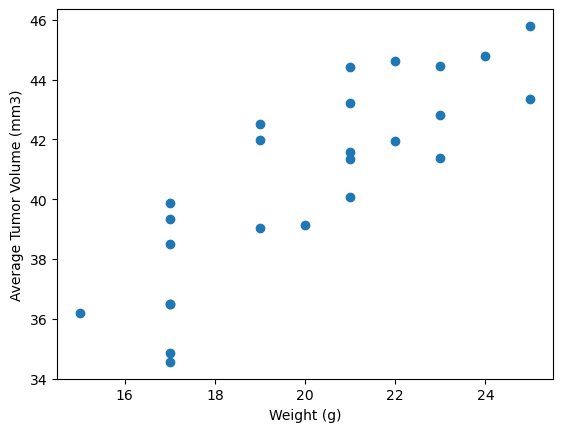

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig2, ax2 = plt.subplots()
capomulin_avg_vol = capomulin_df.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
capomulin_avg_vol
plt.scatter(capomulin_avg_vol['Weight (g)'], capomulin_avg_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

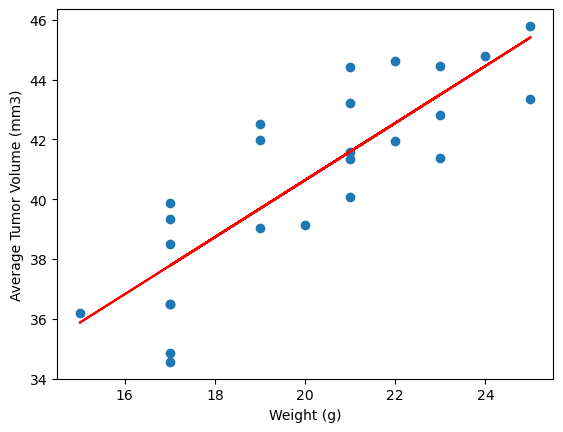

In [57]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# pearson's r: y(dep_var) = (slope * ind. variable) + y-intercept
weight = capomulin_avg_vol.loc[:,'Weight (g)']
tumor_vol = capomulin_avg_vol.loc[:,'Tumor Volume (mm3)']
correlation = st.pearsonr(tumor_vol,weight)
cap_slope, cap_int, cap_r, cap_p, cap_std_err = linregress(weight, tumor_vol)
cap_fit = cap_slope * weight + cap_int
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')
plt.scatter(weight,tumor_vol)
plt.plot(weight,cap_fit, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')